In [2]:
import torch
import matplotlib.pyplot as plt

# Exo 1

In [3]:

dtype = torch.float
device = torch.device("cpu")

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 1000, 1, 10, 1

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = 3*x+2

# 0) Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
b = torch.randn(1, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-5
for t in range(10001):
    # 1) Forward pass: compute predicted y
    z = x.mm(w1)+b.repeat(N,1)
    z_relu = z.clamp(min=0)
    y_pred = z_relu.mm(w2)

    # 2) Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 500 == 0:
         print(t, loss)

    # 3) Backpropagate to compute gradients of w1, w2 and b with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = z_relu.t().mm(grad_y_pred)


    grad_z_relu = grad_y_pred.mm(w2.t())
    grad_z = grad_z_relu.clone()
    grad_z[z < 0] = 0
    grad_w1 = x.t().mm(grad_z)

    grad_b = grad_z.sum(0)

    # 4) Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    b -= learning_rate * grad_b

0 1644.4560546875
500 8.736309051513672
1000 4.725722312927246
1500 3.429281711578369
2000 2.648707389831543
2500 2.111158609390259
3000 1.7253985404968262
3500 1.4282621145248413
4000 1.1879757642745972
4500 0.9945704936981201
5000 0.8367229700088501
5500 0.6993013620376587
6000 0.5807164311408997
6500 0.484169602394104
7000 0.4064309895038605
7500 0.33553603291511536
8000 0.27450597286224365
8500 0.2276339828968048
9000 0.1907367706298828
9500 0.16035985946655273
10000 0.13545472919940948


On remarque que malgré une initialisation aléatoire des poids, le reseau de neuronne apprend bien la fonction tel que la valeur moyenne de la fonction de coût descend toujours progressivement sous les 0.5

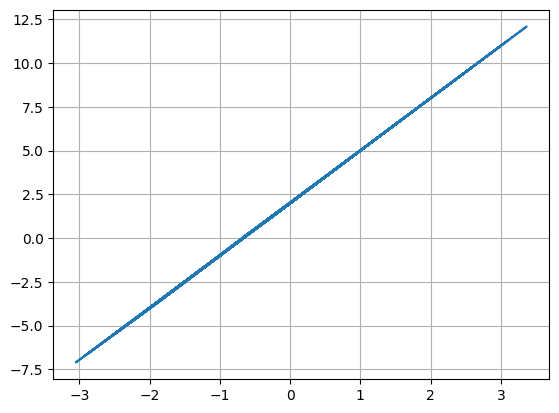

tensor([[0.0000, 2.0000, 1.9891],
        [0.0526, 2.1579, 2.1489],
        [0.1053, 2.3158, 2.3088],
        [0.1579, 2.4737, 2.4686],
        [0.2105, 2.6316, 2.6285],
        [0.2632, 2.7895, 2.7883],
        [0.3158, 2.9474, 2.9482],
        [0.3684, 3.1053, 3.1080],
        [0.4211, 3.2632, 3.2679],
        [0.4737, 3.4211, 3.4277],
        [0.5263, 3.5789, 3.5855],
        [0.5789, 3.7368, 3.7431],
        [0.6316, 3.8947, 3.9007],
        [0.6842, 4.0526, 4.0584],
        [0.7368, 4.2105, 4.2160],
        [0.7895, 4.3684, 4.3736],
        [0.8421, 4.5263, 4.5312],
        [0.8947, 4.6842, 4.6888],
        [0.9474, 4.8421, 4.8464],
        [1.0000, 5.0000, 5.0040]])


In [4]:
# 5) Examining the learnt function
M = 20
x_test = torch.linspace(0,1,M).unsqueeze(1)
x_test = x_test.repeat(1,D_in)

z_test = x_test.mm(w1)+b.repeat(M,1)
z_relu_test = z_test.clamp(min=0)
y_pred_test = z_relu_test.mm(w2)

plt.grid()
plt.plot(list(x[:,0]), list(y_pred[:,0]))
plt.show()

y_test = 3*x_test + 2

print(torch.cat((x_test,y_test,y_pred_test), 1))

On remarque que les prédictions sont vraiment fidèle aux vraies valeur de la fonction (au centième près)

# Exo 2

La fonction de cout utilisée est la somme des erreurs quadratiques (carré de l'équart entre valeur prédite et valeur réelle)

# Exo 3
<img src="ResNeuronne.jpg" width="500">

# Exo 4

Chacune des N entrées dans X(x1, .., xn) passe dans tout les neuronnes N(n1, .., n10) et chacun est multiplié à son propre poids w1.i tq W1(w1.1, .., w1.10) , ils sont ensuite respectivement additionnés avec le même biais b. Apres application de la fonction d'activations, chaque sortie est multipliée à son propre poids w2.i tq W2(w2.1, .., w2.10), toutes ces sorties sont ensuite additionnées entre elles pour obtenir une sortie yi de Y(y1, .., yn)

X : (N, Din)\
W1 : (Din, H)\
XW1 : (N, Din)@(Din, H) = (N, H)\
B : (1, H)\
Transformation en Brepeat : (N, H)\
Z = XW1 + Brepeat : (N, H)\
ZReLU garde la même shape : (N, H)\
W2 : (H, Dout)\
Y= ZReLU * W2 : (N, H)@(H, Dout) = (N, Dout)

# Exo 5
(pas de latex car je maitrise pas et ça serait long)

Il faut donc calculer ∂loss/∂w1, ∂loss/∂w2 et ∂loss/∂b

∂loss/∂w1 = ∂loss/∂ypred * ∂ypred/∂zrelu * ∂zrelu/∂z * ∂z/∂w1
* ∂loss/∂ypred = 2*(ypred-y)
* ∂ypred/∂zrelu = w2
* ∂zrelu/∂z = 1 si z>0 sinon 0 (fctn d'activation)
* ∂z/∂w1 = x

On a donc ∂loss/∂w1 = x * 2*(ypred-y) * w2 * (1 si z>0 sinon 0)

∂loss/∂w2 = ∂loss/∂ypred * ∂ypred/∂w2, avec :
* ∂loss/∂ypred = 2*(ypred−y) et
* ∂ypred/∂w2 = zrelu

On a donc ∂loss∂w2 = 2*zrelu(ypred-y)

∂loss/∂b = ∂loss/∂z * ∂z/∂b
* ∂loss/∂z = 2 * (ypred-y) * w2 * (1 si z>0 sinon 0)
* ∂z/∂b = 1

Comme b est le meme pour toutes les entrées\
On a donc ∂loss/∂b = somme(∂loss/∂zi) pour i de 1 à N

# Exo 7

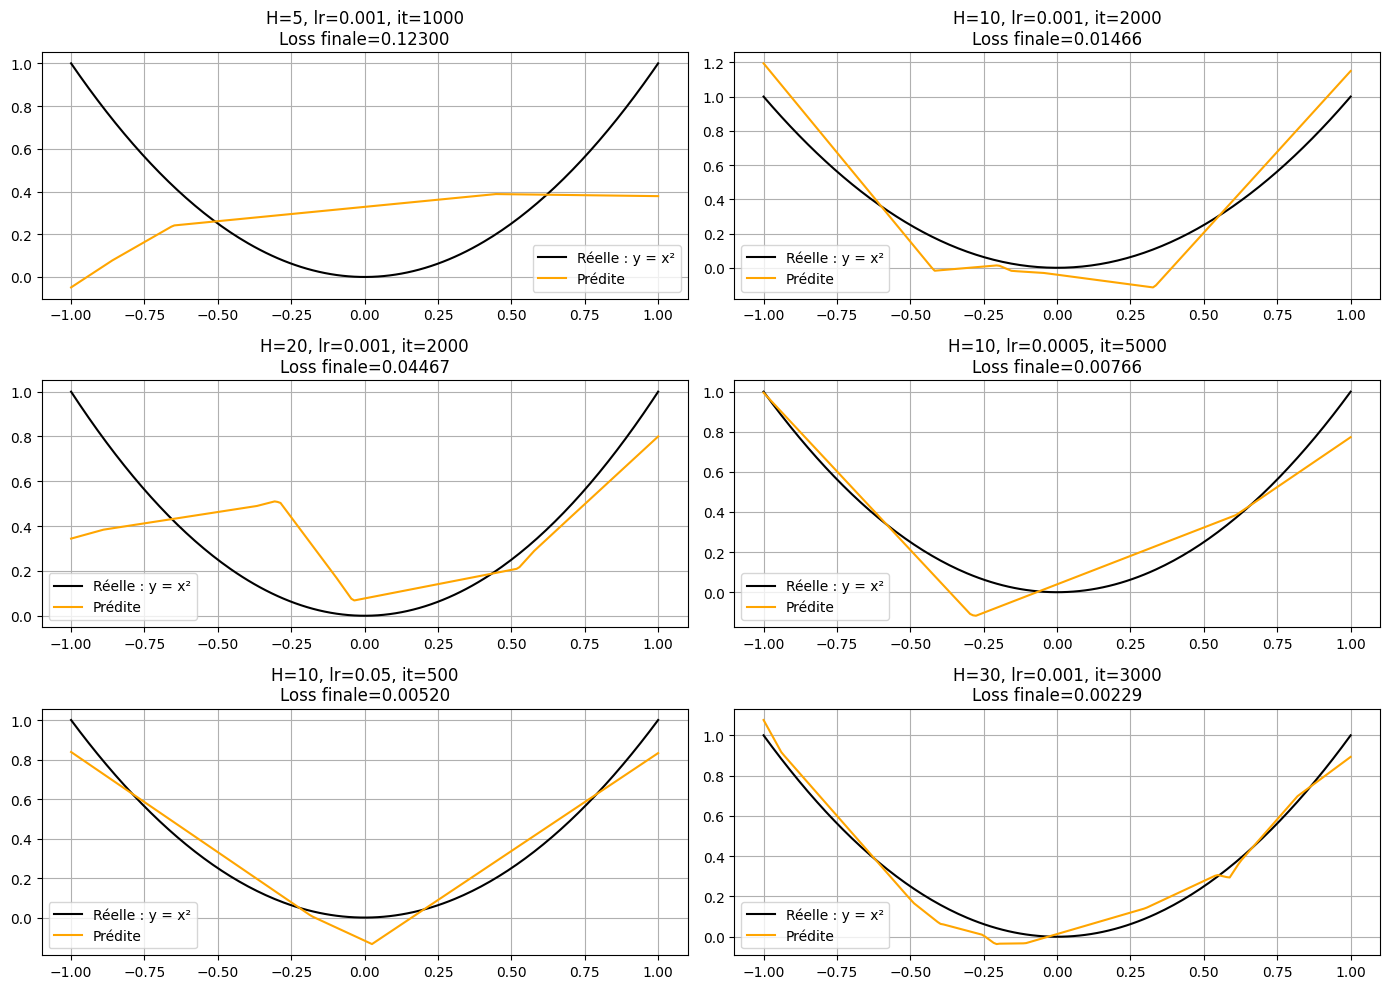

In [ ]:
dtype = torch.float
device = torch.device("cpu")

def function(x):
	return x ** 2

def train(N, D_in, H, D_out, learning_rate, iterations):
	x = torch.rand(N, D_in, device=device, dtype=dtype) * 2 - 1  # entre [-1, 1]
	y = function(x)

	w1 = torch.randn(D_in, H, device=device, dtype=dtype)
	b = torch.randn(1, H, device=device, dtype=dtype)
	w2 = torch.randn(H, D_out, device=device, dtype=dtype)

	for t in range(iterations):
		z = x.mm(w1) + b.repeat(N, 1)
		z_relu = z.clamp(min=0)
		y_pred = z_relu.mm(w2)

		loss = (y_pred - y).pow(2).mean().item()

		grad_y_pred = 2.0 * (y_pred - y) / N
		grad_w2 = z_relu.t().mm(grad_y_pred)
		grad_z_relu = grad_y_pred.mm(w2.t())
		grad_z = grad_z_relu.clone()
		grad_z[z < 0] = 0
		grad_w1 = x.t().mm(grad_z)
		grad_b = grad_z.sum(0)

		w1 -= learning_rate * grad_w1
		w2 -= learning_rate * grad_w2
		b -= learning_rate * grad_b

	x_test = torch.linspace(-1, 1, 200).unsqueeze(1)
	z_test = x_test.mm(w1) + b.repeat(200, 1)
	z_relu_test = z_test.clamp(min=0)
	y_pred_test = z_relu_test.mm(w2)
	y_test = function(x_test)

	return x_test, y_test, y_pred_test, loss


tests = [
	{"H": 5,  "lr": 1e-3, "iter": 1000},
	{"H": 10, "lr": 1e-3, "iter": 2000},
	{"H": 20, "lr": 1e-3, "iter": 2000},
	{"H": 10, "lr": 5e-4, "iter": 5000},
	{"H": 10, "lr": 5e-2, "iter": 500},
	{"H": 30, "lr": 1e-3, "iter": 3000},
]


plt.figure(figsize=(14, 10))
for i, params in enumerate(tests):
	x_test, y_test, y_pred_test, loss = train(
		N=1000, D_in=1, D_out=1,
		H=params["H"], learning_rate=params["lr"], iterations=params["iter"]
	)
	plt.subplot(3, 2, i + 1)
	plt.plot(x_test, y_test, label="Réelle : y = x²", color='black')
	plt.plot(x_test, y_pred_test.detach(), label="Prédite", color='orange')
	plt.title(f"H={params['H']}, lr={params['lr']}, it={params['iter']}\nLoss finale={loss:.5f}")
	plt.legend()
	plt.grid(True)

plt.tight_layout()
plt.show()

Selon les poids de départ ça rend plutôt bien pour les 3-4 derniers tests